# Demo 1: a demo based on visual-92-categories-task MEG data

Here is a demo based on the publicly available visual-92-categories-task MEG datasets. (Reference: Cichy, R. M., Pantazis, D., & Oliva, A. “Resolving human object recognition in space and time.” Nature neuroscience (2014): 17(3), 455-462.) MNE-Python has been used to load this dataset.

In [16]:
# -*- coding: utf-8 -*-

' a demo based on visual-92-categories-task MEG data '
# Users can learn how to use Neurora to do research based on EEG/MEG etc data.

__author__ = 'Zitong Lu'

import numpy as np
import os.path as op
from pandas import read_csv
import mne
from mne.io import read_raw_fif
from mne.datasets import visual_92_categories
from neurora.nps_cal import nps
from neurora.rdm_cal import eegRDM
from neurora.rdm_corr import rdm_correlation_spearman
from neurora.corr_cal_by_rdm import rdms_corr
from neurora.rsa_plot import plot_rdm, plot_corrs_by_time, plot_nps_hotmap, plot_corrs_hotmap

## Section 1: loading example data
Here, we use MNE-Python toolbox for loading data and processing. You can learn this process from MNE-Python (https://mne-tools.github.io/stable/index.html).

In [17]:
data_path = visual_92_categories.data_path()
fname = op.join(data_path, 'visual_stimuli.csv')
conds = read_csv(fname)
conditions = []
for c in conds.values:
    cond_tags = list(c[:2])
    cond_tags += [('not-' if i == 0 else '') + conds.columns[k]
                  for k, i in enumerate(c[2:], 2)]
    conditions.append('/'.join(map(str, cond_tags)))
event_id = dict(zip(conditions, conds.trigger + 1))
print(event_id)
sub_id = [0, 1, 2]
megdata = np.zeros([3, 92, 306, 1101], dtype=np.float32)
subindex = 0
for id in sub_id:
    fname = op.join(data_path, 'sample_subject_'+str(id)+'_tsss_mc.fif')
    raw = read_raw_fif(fname)
    events = mne.find_events(raw, min_duration=.002)
    events = events[events[:, 2] <= 92]
    subdata = np.zeros([92, 306, 1101], dtype=np.float32)
    for i in range(92):
        epochs = mne.Epochs(raw, events=events, event_id=i + 1, baseline=None,
                            tmin=-0.1, tmax=1, preload=True)
        data = epochs.average().data
        subdata[i] = data
    megdata[subindex] = subdata
    subindex = subindex + 1

# the shape of MEG data: megdata is [3, 92, 306, 1101]
# n_subs = 3, n_conditions = 92, n_channels = 306, n_timepoints = 1101 (-100ms to 1000ms)

{'0/human bodypart/human/not-face/animal/natural': 1, '1/human bodypart/human/not-face/animal/natural': 2, '2/human bodypart/human/not-face/animal/natural': 3, '3/human bodypart/human/not-face/animal/natural': 4, '4/human bodypart/human/not-face/animal/natural': 5, '5/human bodypart/human/not-face/animal/natural': 6, '6/human bodypart/human/not-face/animal/natural': 7, '7/human bodypart/human/not-face/animal/natural': 8, '8/human bodypart/human/not-face/animal/natural': 9, '9/human bodypart/human/not-face/animal/natural': 10, '10/human bodypart/human/not-face/animal/natural': 11, '11/human bodypart/human/not-face/animal/natural': 12, '12/human face/human/face/animal/natural': 13, '13/human face/human/face/animal/natural': 14, '14/human face/human/face/animal/natural': 15, '15/human face/human/face/animal/natural': 16, '16/human face/human/face/animal/natural': 17, '17/human face/human/face/animal/natural': 18, '18/human face/human/face/animal/natural': 19, '19/human face/human/face/ani

<ipython-input-17-5375e93cc7e7>:17: RuntimeWarning: This filename (/Users/zitonglu/mne_data/MNE-visual_92_categories-data/sample_subject_0_tsss_mc.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz or _meg.fif
  raw = read_raw_fif(fname)
/Users/zitonglu/anaconda3/lib/python3.7/site-packages/mne/io/tag.py:348: DeprecationWarning: tostring() is deprecated. Use tobytes() instead.
  return str(d.tostring().decode('latin1', 'ignore'))
/Users/zitonglu/anaconda3/lib/python3.7/site-packages/mne/io/tag.py:348: DeprecationWarning: tostring() is deprecated. Use tobytes() instead.
  return str(d.tostring().decode('latin1', 'ignore'))
/Users/zitonglu/anaconda3/lib/python3.7/site-packages/mne/io/tag.py:348: DeprecationWarning: tostring() is deprecated. Use tobytes() instead.
  return str(d.tostring().decode('latin1', 'ignore'))
/Users/zitonglu/anaconda3/lib/python3.7/site-packages/mne/io/tag.p

1374 events found
Event IDs: [  1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17  18
  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35  36
  37  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52  53  54
  55  56  57  58  59  60  61  62  63  64  65  66  67  68  69  70  71  72
  73  74  75  76  77  78  79  80  81  82  83  84  85  86  87  88  89  90
  91  92  93 200 222 244]
10 matching events found
No baseline correction applied
Not setting metadata
0 projection items activated
Loading data for 10 events and 1101 original time points ...
0 bad epochs dropped
10 matching events found
No baseline correction applied
Not setting metadata
0 projection items activated
Loading data for 10 events and 1101 original time points ...
0 bad epochs dropped
10 matching events found
No baseline correction applied
Not setting metadata
0 projection items activated
Loading data for 10 events and 1101 original time points ...
0 bad epochs dropped
10 matching even

0 projection items activated
Loading data for 10 events and 1101 original time points ...
0 bad epochs dropped
10 matching events found
No baseline correction applied
Not setting metadata
0 projection items activated
Loading data for 10 events and 1101 original time points ...
0 bad epochs dropped
10 matching events found
No baseline correction applied
Not setting metadata
0 projection items activated
Loading data for 10 events and 1101 original time points ...
0 bad epochs dropped
10 matching events found
No baseline correction applied
Not setting metadata
0 projection items activated
Loading data for 10 events and 1101 original time points ...
0 bad epochs dropped
10 matching events found
No baseline correction applied
Not setting metadata
0 projection items activated
Loading data for 10 events and 1101 original time points ...
0 bad epochs dropped
10 matching events found
No baseline correction applied
Not setting metadata
0 projection items activated
Loading data for 10 events and 

10 matching events found
No baseline correction applied
Not setting metadata
0 projection items activated
Loading data for 10 events and 1101 original time points ...
0 bad epochs dropped
10 matching events found
No baseline correction applied
Not setting metadata
0 projection items activated
Loading data for 10 events and 1101 original time points ...
0 bad epochs dropped
10 matching events found
No baseline correction applied
Not setting metadata
0 projection items activated
Loading data for 10 events and 1101 original time points ...
0 bad epochs dropped
10 matching events found
No baseline correction applied
Not setting metadata
0 projection items activated
Loading data for 10 events and 1101 original time points ...
0 bad epochs dropped
10 matching events found
No baseline correction applied
Not setting metadata
0 projection items activated
Loading data for 10 events and 1101 original time points ...
0 bad epochs dropped
10 matching events found
No baseline correction applied
Not 

<ipython-input-17-5375e93cc7e7>:17: RuntimeWarning: This filename (/Users/zitonglu/mne_data/MNE-visual_92_categories-data/sample_subject_1_tsss_mc.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz or _meg.fif
  raw = read_raw_fif(fname)
/Users/zitonglu/anaconda3/lib/python3.7/site-packages/mne/io/tag.py:348: DeprecationWarning: tostring() is deprecated. Use tobytes() instead.
  return str(d.tostring().decode('latin1', 'ignore'))
/Users/zitonglu/anaconda3/lib/python3.7/site-packages/mne/io/tag.py:348: DeprecationWarning: tostring() is deprecated. Use tobytes() instead.
  return str(d.tostring().decode('latin1', 'ignore'))
/Users/zitonglu/anaconda3/lib/python3.7/site-packages/mne/io/tag.py:348: DeprecationWarning: tostring() is deprecated. Use tobytes() instead.
  return str(d.tostring().decode('latin1', 'ignore'))
/Users/zitonglu/anaconda3/lib/python3.7/site-packages/mne/io/tag.p

1356 events found
Event IDs: [  1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17  18
  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35  36
  37  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52  53  54
  55  56  57  58  59  60  61  62  63  64  65  66  67  68  69  70  71  72
  73  74  75  76  77  78  79  80  81  82  83  84  85  86  87  88  89  90
  91  92  93 200 222 244]
9 matching events found
No baseline correction applied
Not setting metadata
0 projection items activated
Loading data for 9 events and 1101 original time points ...
0 bad epochs dropped
10 matching events found
No baseline correction applied
Not setting metadata
0 projection items activated
Loading data for 10 events and 1101 original time points ...
0 bad epochs dropped
10 matching events found
No baseline correction applied
Not setting metadata
0 projection items activated
Loading data for 10 events and 1101 original time points ...
0 bad epochs dropped
10 matching events

0 projection items activated
Loading data for 10 events and 1101 original time points ...
0 bad epochs dropped
9 matching events found
No baseline correction applied
Not setting metadata
0 projection items activated
Loading data for 9 events and 1101 original time points ...
0 bad epochs dropped
10 matching events found
No baseline correction applied
Not setting metadata
0 projection items activated
Loading data for 10 events and 1101 original time points ...
0 bad epochs dropped
10 matching events found
No baseline correction applied
Not setting metadata
0 projection items activated
Loading data for 10 events and 1101 original time points ...
0 bad epochs dropped
9 matching events found
No baseline correction applied
Not setting metadata
0 projection items activated
Loading data for 9 events and 1101 original time points ...
0 bad epochs dropped
10 matching events found
No baseline correction applied
Not setting metadata
0 projection items activated
Loading data for 10 events and 1101

No baseline correction applied
Not setting metadata
0 projection items activated
Loading data for 8 events and 1101 original time points ...
0 bad epochs dropped
9 matching events found
No baseline correction applied
Not setting metadata
0 projection items activated
Loading data for 9 events and 1101 original time points ...
0 bad epochs dropped
9 matching events found
No baseline correction applied
Not setting metadata
0 projection items activated
Loading data for 9 events and 1101 original time points ...
0 bad epochs dropped
10 matching events found
No baseline correction applied
Not setting metadata
0 projection items activated
Loading data for 10 events and 1101 original time points ...
0 bad epochs dropped
10 matching events found
No baseline correction applied
Not setting metadata
0 projection items activated
Loading data for 10 events and 1101 original time points ...
0 bad epochs dropped
10 matching events found
No baseline correction applied
Not setting metadata
0 projection 

<ipython-input-17-5375e93cc7e7>:17: RuntimeWarning: This filename (/Users/zitonglu/mne_data/MNE-visual_92_categories-data/sample_subject_2_tsss_mc.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz or _meg.fif
  raw = read_raw_fif(fname)
/Users/zitonglu/anaconda3/lib/python3.7/site-packages/mne/io/tag.py:348: DeprecationWarning: tostring() is deprecated. Use tobytes() instead.
  return str(d.tostring().decode('latin1', 'ignore'))
/Users/zitonglu/anaconda3/lib/python3.7/site-packages/mne/io/tag.py:348: DeprecationWarning: tostring() is deprecated. Use tobytes() instead.
  return str(d.tostring().decode('latin1', 'ignore'))
/Users/zitonglu/anaconda3/lib/python3.7/site-packages/mne/io/tag.py:348: DeprecationWarning: tostring() is deprecated. Use tobytes() instead.
  return str(d.tostring().decode('latin1', 'ignore'))
/Users/zitonglu/anaconda3/lib/python3.7/site-packages/mne/io/tag.p

Trigger channel has a non-zero initial value of 28 (consider using initial_event=True to detect this event)
Removing orphaned offset at the beginning of the file.
1294 events found
Event IDs: [  1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17  18
  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35  36
  37  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52  53  54
  55  56  57  58  59  60  61  62  63  64  65  66  67  68  69  70  71  72
  73  74  75  76  77  78  79  80  81  82  83  84  85  86  87  88  89  90
  91  92  93 200 222 244]
10 matching events found
No baseline correction applied
Not setting metadata
0 projection items activated
Loading data for 10 events and 1101 original time points ...
0 bad epochs dropped
10 matching events found
No baseline correction applied
Not setting metadata
0 projection items activated
Loading data for 10 events and 1101 original time points ...
0 bad epochs dropped
8 matching events found
No baseline corre

0 bad epochs dropped
10 matching events found
No baseline correction applied
Not setting metadata
0 projection items activated
Loading data for 10 events and 1101 original time points ...
0 bad epochs dropped
9 matching events found
No baseline correction applied
Not setting metadata
0 projection items activated
Loading data for 9 events and 1101 original time points ...
0 bad epochs dropped
9 matching events found
No baseline correction applied
Not setting metadata
0 projection items activated
Loading data for 9 events and 1101 original time points ...
0 bad epochs dropped
9 matching events found
No baseline correction applied
Not setting metadata
0 projection items activated
Loading data for 9 events and 1101 original time points ...
0 bad epochs dropped
11 matching events found
No baseline correction applied
Not setting metadata
0 projection items activated
Loading data for 11 events and 1101 original time points ...
0 bad epochs dropped
10 matching events found
No baseline correcti

0 bad epochs dropped
11 matching events found
No baseline correction applied
Not setting metadata
0 projection items activated
Loading data for 11 events and 1101 original time points ...
0 bad epochs dropped
10 matching events found
No baseline correction applied
Not setting metadata
0 projection items activated
Loading data for 10 events and 1101 original time points ...
0 bad epochs dropped
10 matching events found
No baseline correction applied
Not setting metadata
0 projection items activated
Loading data for 10 events and 1101 original time points ...
0 bad epochs dropped
9 matching events found
No baseline correction applied
Not setting metadata
0 projection items activated
Loading data for 9 events and 1101 original time points ...
0 bad epochs dropped
9 matching events found
No baseline correction applied
Not setting metadata
0 projection items activated
Loading data for 9 events and 1101 original time points ...
0 bad epochs dropped
9 matching events found
No baseline correct

## Section 2: Preprocessing

In [18]:
# shape of megdata: [n_subs, n_cons, n_chls, n_ts] -> [n_cons, n_subs, n_chls, n_ts]
megdata = np.transpose(megdata, (1, 0, 2, 3))

# shape of megdata: [n_cons, n_subs, n_chls, n_ts] -> [n_cons, n_subs, n_trials, n_chls, n_ts]
# here data is averaged, so set n_trials = 1
megdata = np.reshape(megdata, [92, 3, 1, 306, 1101])

## Section 3: Calculating the neural pattern similarity

0 0.01 1.0
(5, 100)


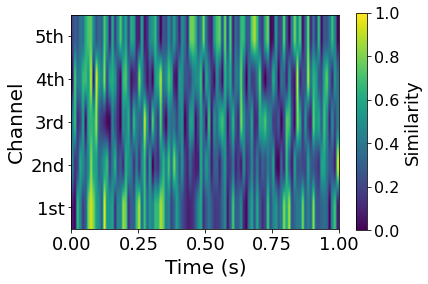

0 0.01 1.0
(5, 5000)


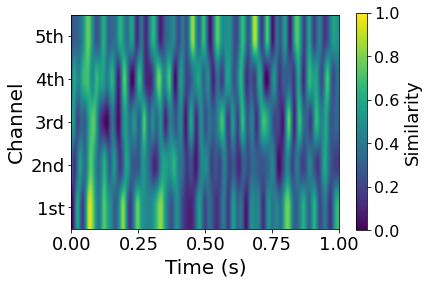

In [19]:
# Get data under different condition
# Here we calculate the neural pattern similarity (NPS) between two stimulus
# Seeing Humanface vs. Seeing Non-Humanface

# get data under "humanface" condtion
megdata_humanface = megdata[12:24]
# get data under "nonhumanface" condition
megdata_nonhumanface = megdata[36:48]

# Average the data
avg_megdata_humanface = np.average(megdata_humanface, axis=0)
avg_megdata_nonhumanface = np.average(megdata_nonhumanface, axis=0)

# Create NPS input data
# Here we extract the data from first 5 channels between 0ms and 1000ms
nps_data = np.zeros([2, 3, 1, 5, 1000]) # n_cons=2, n_subs=3, n_chls=5, n_ts=1000
nps_data[0] = avg_megdata_humanface[:, :, :5, 100:1100] # the start time of the data is -100ms
nps_data[1] = avg_megdata_nonhumanface[:, :, :5, 100:1100] # so 100:1200 corresponds 0ms-1000ms

# Calculate the NPS with a 10ms time-window
# (raw sampling requency is 1000Hz, so here time_win=10ms/(1s/1000Hz)/1000=10)
nps = nps(nps_data, time_win=10, time_step=10)

# Plot the NPS results
plot_nps_hotmap(nps[:, :, 0], time_unit=[0, 0.01], abs=True)

# Smooth the results and plot
plot_nps_hotmap(nps[:, :, 0], time_unit=[0, 0.01], abs=True, smooth=True)

## Section 4: Calculating single RDM and Plotting

In [20]:
# Calculate the RDM based on the data during 190ms-210ms
rdm = eegRDM(megdata[:, :, :, :, 290:310])

# Plot this RDM
plot_rdm(rdm, percentile=True)

TypeError: plot_rdm() got an unexpected keyword argument 'percentile'

## Section 5: Calculating RDMs and Plotting

In [ ]:
# Calculate the RDMs by a 10ms time-window
# (raw sampling requency is 1000Hz, so here time_win=10ms/(1s/1000Hz)/1000=10)
rdms = eegRDM(megdata, time_opt=1, time_win=10, time_step=10)

# Plot the RDM of -100ms, 0ms, 50ms, 100ms, 150ms, 200ms
times = [0, 10, 20, 30, 40, 50]
for t in times:
    plot_rdm(rdms[t], percentile=True)

## Section 6: Calculating the Similarity between two RDMs

In [ ]:
# RDM of 200ms
rdm_sample1 = rdms[30]
# RDM of 800ms
rdm_sample2 = rdms[90]

# calculate the correlation coefficient between these two RDMs
corr = rdm_correlation_spearman(rdm_sample1, rdm_sample2)
print(corr)

## Section 7: Calculating the Similarity and Plotting

In [ ]:
# Calculate the representational similarity between 200ms and all the time points
corrs1 = rdms_corr(rdm_sample1, rdms)

# Plot the corrs1
corrs1 = np.reshape(corrs1, [1, 110, 2])
plot_corrs_by_time(corrs1, time_unit=[-0.1, 0.01])

# Calculate and Plot multi-corrs
corrs2 = rdms_corr(rdm_sample2, rdms)
corrs = np.zeros([2, 110, 2])
corrs[0] = corrs1
corrs[1] = corrs2
labels = ["by 200ms's data", "by 800ms's data"]
plot_corrs_by_time(corrs, labels=labels, time_unit=[-0.1, 0.01])

## Section 8: Calculating the RDMs for each channels

In [ ]:
# Calculate the RDMs for the first six channels by a 10ms time-window between 0ms and 1000ms
rdms_chls = eegRDM(megdata[:, :, :, :6, 100:1100], chl_opt=1, time_opt=1, time_win=10, time_step=10)

# Create a 'human-related' coding model RDM
model_rdm = np.ones([92, 92])
for i in range(92):
    for j in range(92):
        if (i < 24) and (j < 24):
            model_rdm[i, j] = 0
    model_rdm[i, i] = 0

# Plot this coding model RDM
plot_rdm(model_rdm)

# Calculate the representational similarity between the neural activities and the coding model for each channel
corrs_chls = rdms_corr(model_rdm, rdms_chls)

# Plot the representational similarity results
plot_corrs_hotmap(corrs_chls, time_unit=[0, 0.01])

# Set more parameters and re-plot
plot_corrs_hotmap(corrs_chls, time_unit=[0, 0.01], lim=[-0.15, 0.15], smooth=True, cmap='bwr')